## Instalar e importar las bibliotecas necesarias
Primero, vamos a importar las bibliotecas necesarias:

In [1]:

# Importa la biblioteca pandas para manipulación de datos en forma de tablas (DataFrames)
import pandas as pd

# Importa la biblioteca numpy para operaciones matemáticas y manejo de arreglos
import numpy as np

# Importa funciones de scikit-learn para dividir los datos en entrenamiento y prueba
from sklearn.model_selection import train_test_split

# Importa el modelo de regresión logística
from sklearn.linear_model import LogisticRegression

# Importa el StandardScaler para normalizar los datos
from sklearn.preprocessing import StandardScaler


# Importa la función log_loss para evaluar el rendimiento del modelo
from sklearn.metrics import log_loss

# Importa matplotlib para crear gráficos
import matplotlib.pyplot as plt

# Configura matplotlib para mostrar los gráficos directamente en el notebook
%matplotlib inline

# Importa el módulo de advertencias y desactiva las advertencias para evitar mensajes innecesarios
import warnings
warnings.filterwarnings('ignore')


## Clasificación con Regresión Logística

### Escenario
Supón que estás trabajando para una empresa de telecomunicaciones (Telco) que está preocupada por el número de clientes que están dejando su servicio de línea fija para irse con la competencia. La empresa necesita entender quiénes tienen más probabilidad de abandonar la compañía.

###  Cargar los datos de abandono de Telco
ChurnData es un archivo de datos hipotético que trata sobre los esfuerzos de una empresa de telecomunicaciones para reducir la pérdida de clientes. Cada caso corresponde a un cliente distinto y registra diversa información demográfica y sobre el uso de los servicios.
Antes de poder trabajar con los datos, debes usar la URL para obtener el archivo ChurnData.csv.


### Acerca del conjunto de datos

Se trata de un conjunto de datos históricos de clientes, donde cada fila representa a un cliente individual.

Normalmente, es menos costoso retener clientes que adquirir nuevos, por lo que el enfoque de este análisis es predecir qué clientes permanecerán en la empresa.

Este conjunto de datos proporciona información sobre las preferencias de los clientes, los servicios contratados, detalles personales, etc., lo cual ayuda a predecir el abandono de clientes.


### Load Data from URL


In [14]:
# URL del archivo CSV con los datos de abandono de clientes (churn) de Telco
url = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ML0101EN-SkillsNetwork/labs/Module%203/data/ChurnData.csv"

# Carga el archivo CSV directamente desde la URL en un DataFrame de pandas
data = pd.read_csv(url)

# Muestra el contenido del DataFrame para visualizar los datos cargados
data


,tenure,age,address,income,ed,employ,equip,callcard,wireless,longmon,...,pager,internet,callwait,confer,ebill,loglong,logtoll,lninc,custcat,churn
0,11.0,33.0,7.0,136.0,5.0,5.0,0.0,1.0,1.0,4.40,...,1.0,0.0,1.0,1.0,0.0,1.482,3.033,4.913,4.0,1.0
1,33.0,33.0,12.0,33.0,2.0,0.0,0.0,0.0,0.0,9.45,...,0.0,0.0,0.0,0.0,0.0,2.246,3.240,3.497,1.0,1.0
2,23.0,30.0,9.0,30.0,1.0,2.0,0.0,0.0,0.0,6.30,...,0.0,0.0,0.0,1.0,0.0,1.841,3.240,3.401,3.0,0.0
3,38.0,35.0,5.0,76.0,2.0,10.0,1.0,1.0,1.0,6.05,...,1.0,1.0,1.0,1.0,1.0,1.800,3.807,4.331,4.0,0.0
4,7.0,35.0,14.0,80.0,2.0,15.0,0.0,1.0,0.0,7.10,...,0.0,0.0,1.0,1.0,0.0,1.960,3.091,4.382,3.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
195,55.0,44.0,24.0,83.0,1.0,23.0,0.0,1.0,0.0,17.35,...,0.0,0.0,0.0,1.0,0.0,2.854,3.199,4.419,3.0,0.0
196,34.0,23.0,3.0,24.0,1.0,7.0,0.0,1.0,0.0,6.00,...,0.0,0.0,1.0,1.0,0.0,1.792,3.332,3.178,3.0,0.0
197,6.0,32.0,10.0,47.0,1.0,10.0,0.0,1.0,0.0,3.85,...,0.0,0.0,1.0,1.0,0.0,1.348,3.168,3.850,3.0,0.0
198,24.0,30.0,0.0,25.0,4.0,5.0,0.0,1.0,1.0,8.70,...,1.0,1.0,1.0,1.0,1.0,2.163,3.866,3.219,4.0,1.0


Vamos a seleccionar algunas características para construir el modelo. Además, cambiamos el tipo de dato de la variable objetivo para que sea un entero, ya que es un requisito del algoritmo de scikit-learn.


## Preprocesamiento de los datos


Para este laboratorio, vamos a usar un subconjunto de los campos disponibles para desarrollar nuestro modelo:
- tenure → antigüedad (tiempo que el cliente ha estado con la empresa)
- age → edad
- address → dirección (puede referirse al número de años en la misma dirección)
- income → ingresos
- ed → nivel educativo
- employ → años de empleo (o situación laboral)
- equip → equipo (equipos contratados)
- churn → abandono (si el cliente ha dejado la empresa o no)


In [3]:
churn_df = data[['tenure', 'age', 'address', 'income', 'ed', 'employ', 'equip', 'churn']]
churn_df['churn'] = churn_df['churn'].astype('int')
churn_df

,tenure,age,address,income,ed,employ,equip,churn
0,11.0,33.0,7.0,136.0,5.0,5.0,0.0,1
1,33.0,33.0,12.0,33.0,2.0,0.0,0.0,1
2,23.0,30.0,9.0,30.0,1.0,2.0,0.0,0
3,38.0,35.0,5.0,76.0,2.0,10.0,1.0,0
4,7.0,35.0,14.0,80.0,2.0,15.0,0.0,0
...,...,...,...,...,...,...,...,...
195,55.0,44.0,24.0,83.0,1.0,23.0,0.0,0
196,34.0,23.0,3.0,24.0,1.0,7.0,0.0,0
197,6.0,32.0,10.0,47.0,1.0,10.0,0.0,0
198,24.0,30.0,0.0,25.0,4.0,5.0,0.0,1


Para construir el modelo, es necesario definir los campos de entrada X y el campo objetivo y.
Dado que la variable que se desea predecir es 'churn', los datos de esta columna se almacenarán en la variable y.
Podemos usar cualquier combinación, o todos los campos restantes, como variables de entrada.
Estos valores se almacenarán en la variable X.


In [4]:

# Extrae las columnas seleccionadas del DataFrame y las convierte en un arreglo de NumPy.
# Estas columnas representan las variables independientes (X) que se usarán para entrenar el modelo.
X = np.asarray(churn_df[['tenure', 'age', 'address', 'income', 'ed', 'employ', 'equip']])

# Muestra los primeros 5 registros del arreglo X para revisar los datos seleccionados.
X[0:5]  # Imprime los primeros 5 valores


array([[ 11.,  33.,   7., 136.,   5.,   5.,   0.],
       [ 33.,  33.,  12.,  33.,   2.,   0.,   0.],
       [ 23.,  30.,   9.,  30.,   1.,   2.,   0.],
       [ 38.,  35.,   5.,  76.,   2.,  10.,   1.],
       [  7.,  35.,  14.,  80.,   2.,  15.,   0.]])

In [5]:

# Extrae la columna 'churn' del DataFrame y la convierte en un arreglo de NumPy.
# Esta columna representa la variable dependiente (y), es decir, el objetivo que se desea predecir.
y = np.asarray(churn_df['churn'])

# Muestra los primeros 5 valores del arreglo y para revisar los datos de la variable objetivo.
y[0:5]  # Imprime los primeros 5 valores


array([1, 1, 0, 0, 0])

También es una práctica común estandarizar o normalizar el conjunto de datos para que todas las características estén en la misma escala. Esto ayuda al modelo a aprender más rápido y mejora su rendimiento.

Podemos utilizar la función StandardScaler de la biblioteca Scikit-Learn para realizar esta tarea.


In [6]:

# Aplica la estandarización a los datos de entrada X utilizando StandardScaler.
# Esto transforma las características para que tengan media 0 y desviación estándar 1,
# lo que ayuda a mejorar el rendimiento del modelo.
X_norm = StandardScaler().fit(X).transform(X)

# Muestra los primeros 5 registros del conjunto de datos ya estandarizado.
X_norm[0:5]  # Imprime los primeros 5 valores normalizados


array([[-1.13518441, -0.62595491, -0.4588971 ,  0.4751423 ,  1.6961288 ,
        -0.58477841, -0.85972695],
       [-0.11604313, -0.62595491,  0.03454064, -0.32886061, -0.6433592 ,
        -1.14437497, -0.85972695],
       [-0.57928917, -0.85594447, -0.261522  , -0.35227817, -1.42318853,
        -0.92053635, -0.85972695],
       [ 0.11557989, -0.47262854, -0.65627219,  0.00679109, -0.6433592 ,
        -0.02518185,  1.16316   ],
       [-1.32048283, -0.47262854,  0.23191574,  0.03801451, -0.6433592 ,
         0.53441472, -0.85972695]])

### División del dataset


El modelo entrenado debe ser probado y evaluado con datos que no se hayan utilizado durante el entrenamiento.
Por lo tanto, es necesario separar una parte de los datos para pruebas y usar el resto para entrenamiento.
Para esto, podemos utilizar la función train_test_split de la biblioteca scikit-learn.


In [7]:

# Divide el conjunto de datos en dos partes: entrenamiento y prueba.
# X_norm son las variables independientes ya normalizadas, y es la variable objetivo.
# test_size=0.2 indica que el 20% de los datos se usarán para prueba y el 80% para entrenamiento.
# random_state=4 asegura que la división sea reproducible (si se ejecuta el código nuevamente, se obtendrá la misma división).
X_train, X_test, y_train, y_test = train_test_split(X_norm, y, test_size=0.2, random_state=4)


## Modelado con el clasificador de regresión logística


Vamos a construir el modelo utilizando LogisticRegression del paquete Scikit-learn y ajustarlo con el conjunto de datos de entrenamiento.


In [8]:
# Crea una instancia del modelo de regresión logística y lo ajusta (entrena) usando los datos de entrenamiento.
# X_train contiene las variables independientes normalizadas, y_train contiene las etiquetas (churn).
LR = LogisticRegression().fit(X_train, y_train)

El ajuste del modelo (o en términos simples, el entrenamiento) nos proporciona un modelo que ya ha aprendido a partir de los datos de entrenamiento y que ahora puede usarse para predecir la variable objetivo.

Vamos a predecir el parámetro churn (abandono) para el conjunto de datos de prueba.

In [9]:

# Utiliza el modelo de regresión logística entrenado (LR) para hacer predicciones sobre el conjunto de prueba (X_test).
# Las predicciones corresponden a la variable objetivo 'churn' (abandono).
yhat = LR.predict(X_test)

# Muestra las primeras 10 predicciones realizadas por el modelo.
yhat[:10]  # Imprime los primeros 10 valores predichos


array([0, 0, 0, 0, 0, 0, 0, 0, 1, 0])

Para comprender mejor esta predicción, también podemos observar la probabilidad de predicción de cada punto de datos del conjunto de prueba.
Usando la función predict_proba, podemos obtener la probabilidad de cada clase.

- La primera columna representa la probabilidad de que el registro pertenezca a la clase 0.
- La segunda columna representa la probabilidad de que pertenezca a la clase 1.

Ten en cuenta que el sistema de predicción de clases utiliza un umbral de 0.5 para decidir la clase.
Esto significa que se predice la clase que tiene mayor probabilidad.

In [10]:

# Utiliza el modelo de regresión logística entrenado (LR) para obtener las probabilidades de predicción
# para cada clase (0 y 1) en el conjunto de prueba (X_test).
# La salida es una matriz donde:
# - La primera columna representa la probabilidad de que el cliente NO abandone (clase 0).
# - La segunda columna representa la probabilidad de que el cliente SÍ abandone (clase 1).
yhat_prob = LR.predict_proba(X_test)

# Muestra las primeras 10 filas de probabilidades predichas para revisar los resultados.
yhat_prob[:10]  # Imprime las primeras 10 probabilidades de predicción


array([[0.74643946, 0.25356054],
       [0.92667894, 0.07332106],
       [0.83442627, 0.16557373],
       [0.94600618, 0.05399382],
       [0.84325532, 0.15674468],
       [0.71448367, 0.28551633],
       [0.77076426, 0.22923574],
       [0.90955642, 0.09044358],
       [0.26152115, 0.73847885],
       [0.94900731, 0.05099269]])

Dado que el objetivo aquí es predecir con mayor precisión la clase 1 (clientes que abandonan), también puedes examinar qué papel juega cada característica de entrada en la predicción de dicha clase.


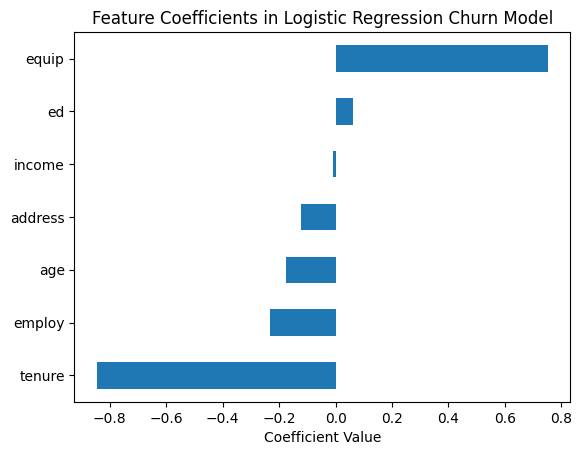

In [11]:
# Crea una serie de pandas con los coeficientes del modelo de regresión logística.
# LR.coef_[0] contiene los coeficientes que indican la influencia de cada característica en la predicción.
# Se asignan como índice los nombres de las columnas (excepto 'churn', que es la variable objetivo).
coefficients = pd.Series(LR.coef_[0], index=churn_df.columns[:-1])

# Ordena los coeficientes de menor a mayor y los grafica como un gráfico de barras horizontal.
coefficients.sort_values().plot(kind='barh')

# Añade un título al gráfico.
plt.title("Coeficientes de las características en el modelo de regresión logística de abandono")

# Añade una etiqueta al eje X indicando que se trata del valor del coeficiente.
plt.xlabel("Valor del coeficiente")

# Muestra el gráfico en pantalla.
plt.show()


Un valor positivo grande del coeficiente de regresión logística para un campo determinado indica que un aumento en ese parámetro incrementa la probabilidad de obtener un resultado positivo, es decir, pertenecer a la clase 1.

Un valor negativo grande indica lo contrario: un aumento en ese parámetro reduce la probabilidad de pertenecer a la clase 1.

Un valor absoluto bajo indica que ese campo tiene poca influencia en la clase predicha.


## Evaluación de la actuación del modelo


Una vez que se han generado las predicciones, conviene evaluar el rendimiento del modelo en la predicción de la variable objetivo. Evaluemos el valor de la pérdida logarítmica (log loss).

### Pérdida Logarítmica (Log Loss)
La pérdida logarítmica, también conocida como pérdida de entropía cruzada binaria, es una función que genera un valor de pérdida (cuánto se ha equivocado el modelo) basado en las probabilidades que el modelo asigna a cada clase y las etiquetas reales de clase. Cuanto menor sea el valor de log loss, mejor se considera que es el modelo.


In [12]:

# Calcula la pérdida logarítmica entre las etiquetas reales y las probabilidades predichas
# y_test: etiquetas verdaderas del conjunto de prueba
# yhat_prob: probabilidades predichas por el modelo para cada clase
# La función devuelve un valor que indica lo bien que el modelo ha predicho las clases,
# teniendo en cuenta no solo si acertó, sino con qué nivel de certeza lo hizo.
loss_value = log_loss(y_test, yhat_prob)

0.6257718410257235

## Supongamos que añadimos la característica 'callcard' al conjunto original de características de entrada. ¿Cuál será el valor de log loss en este caso?


In [19]:

# Añadimos 'callcard' a la lista de características
features = ['tenure', 'age', 'income', 'ed', 'employ', 'equip', 'callcard']

# Definimos X e y
X = data[features]
y = churn_df['churn']

# Dividimos en conjunto de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=4)


# Entrenamos el modelo
LR = LogisticRegression().fit(X_train, y_train)

# Obtenemos las probabilidades predichas
yhat_prob = LR.predict_proba(X_test)


# Calculamos el log loss
loss_value = log_loss(y_test, yhat_prob)
print("Log Loss con 'callcard':", loss_value)


Log Loss con 'callcard': 0.5943080130160874


## Supongamos que añadimos la característica 'wireless' al conjunto original de características de entrada. ¿Cuál será el valor de log loss en este caso?

In [23]:

# Añadimos 'wireless' a la lista de características
features = ['tenure', 'age', 'income', 'ed', 'employ', 'equip', 'wireless']

# Definimos X e y
X = data[features]
y = churn_df['churn']

# División, entrenamiento y evaluación igual que antes
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=4)
model = LogisticRegression()
model.fit(X_train, y_train)
yhat_prob = model.predict_proba(X_test)
loss_value = log_loss(y_test, yhat_prob)
print("Log Loss con 'wireless':", loss_value)


Log Loss con 'wireless': 0.6768271023692083


## ¿Qué ocurre con el valor de log loss si añadimos tanto "callcard" como "wireless" a las características de entrada?

In [24]:

# Añadimos ambas características
features = ['tenure', 'age', 'income', 'ed', 'employ', 'equip', 'callcard', 'wireless']

# Definimos X e y
X = data[features]
y = churn_df['churn']

# División, entrenamiento y evaluación
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=4)
model = LogisticRegression()
model.fit(X_train, y_train)
yhat_prob = model.predict_proba(X_test)
loss_value = log_loss(y_test, yhat_prob)
print("Log Loss con 'callcard' y 'wireless':", loss_value)


Log Loss con 'callcard' y 'wireless': 0.6885360391076638


## ¿Qué ocurre con el log loss si eliminamos la característica 'equip' del conjunto original de características de entrada?

In [25]:

# Quitamos 'equip' de la lista de características
features = ['tenure', 'age', 'income', 'ed', 'employ']

# Definimos X e y
X = data[features]
y = churn_df['churn']

# División, entrenamiento y evaluación
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=4)
model = LogisticRegression()
model.fit(X_train, y_train)
yhat_prob = model.predict_proba(X_test)
loss_value = log_loss(y_test, yhat_prob)
print("Log Loss sin 'equip':", loss_value)


Log Loss sin 'equip': 0.5273518748709292


## ¿Qué ocurre con el log loss si eliminamos las características 'income' y 'employ' del conjunto original de características de entrada?

In [26]:

# Quitamos 'income' y 'employ' de la lista de características
features = ['tenure', 'age', 'ed', 'equip']

# Definimos X e y
X = data[features]
y = churn_df['churn']

# División, entrenamiento y evaluación
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=4)
model = LogisticRegression()
model.fit(X_train, y_train)
yhat_prob = model.predict_proba(X_test)
loss_value = log_loss(y_test, yhat_prob)
print("Log Loss sin 'income' y 'employ':", loss_value)


Log Loss sin 'income' y 'employ': 0.6296950519882462
